In [105]:
from sklearn import linear_model
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
data = pd.read_csv("Boston.csv - Boston.csv")

In [107]:
data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [108]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [109]:
data.shape

(506, 13)

# <font color=indigo>EDA</font>
#### <font color=blue>These are columns and features for the target dataset MEDV </font><br>
 Attribute Information (in order):<br>
1 <b>CRIM:</b> per capita crime rate by town<br>
2 <b>ZN:</b> proportion of residential land zoned for lots over 25,000 sq.ft.<br>
4 <b>INDUS:</b> proportion of non-retail business acres per town<br>
5 <b>CHAS:</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
6 <b>NOx1:</b> nitric oxides concentration (parts per 10 million)<br>
7 <b>RM:</b> average number of rooms per dwelling<br>
8 <b>AGE:</b> proportion of owner-occupied units built prior to 1940<br>
9 <b>DIS:</b> weighted distances to five Boston employment centres<br>
10 <b>RAD:</b> index of accessibility to radial highways<br>
11 <b>TAX:</b> full-value property-tax rate per 10,000 dollars<br>
12 <b>PTRATIO:</b> pupil-teacher ratio by town<br>
13 <b>LSTAT:</b> %lower status of the population<br>
14 <b>MEDV:</b> Median value of owner-occupied homes in 1000 dollars. (Target variable)

<Figure size 14400x7200 with 0 Axes>

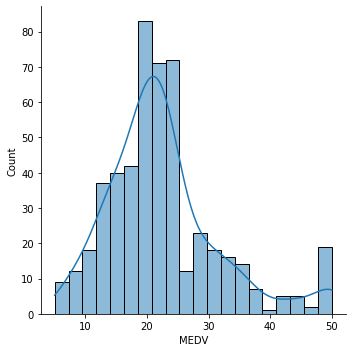

In [110]:
plt.figure(figsize=(200,100))
sns.displot(data['MEDV'],kde=True,bins = 20);

In [111]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

#### The above data shows that there is a huge differnce between 50%ile and mean that shows the graph is now right scwed.

In [112]:
numeric_feature = data.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [113]:
correlation = numeric_feature.corr()
print(correlation['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<AxesSubplot:title={'center':'Corelation of numeric feature with MEDV'}>

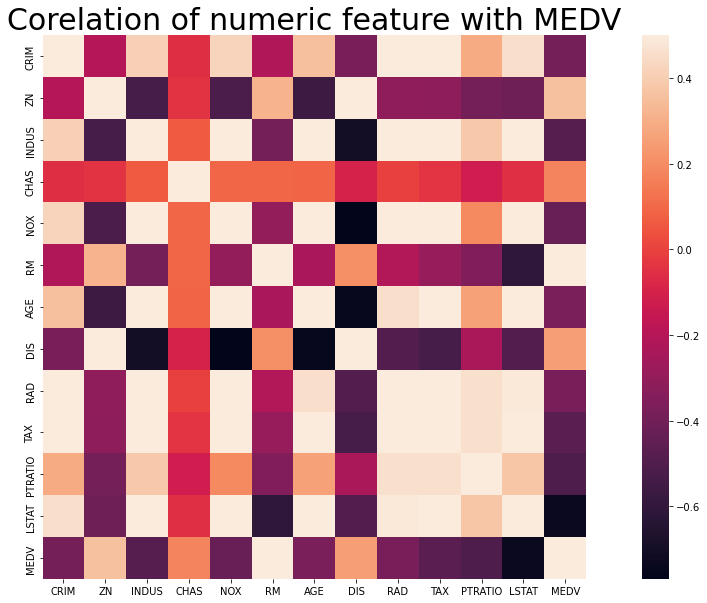

In [114]:
plt.figure(figsize=(20,10))
plt.title("Corelation of numeric feature with MEDV",y=1,size= 30)
sns.heatmap(correlation,square=True,vmax=0.5)

The above heatmap shows that RM is the highest correlated feature with MEDV as the lghter color shows that higher correlation and darker color is also highly correlated with MEDV feature but in a negetive way i.e. the MEDV decrease with the increase of those feature value that feature is LSTAT.

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

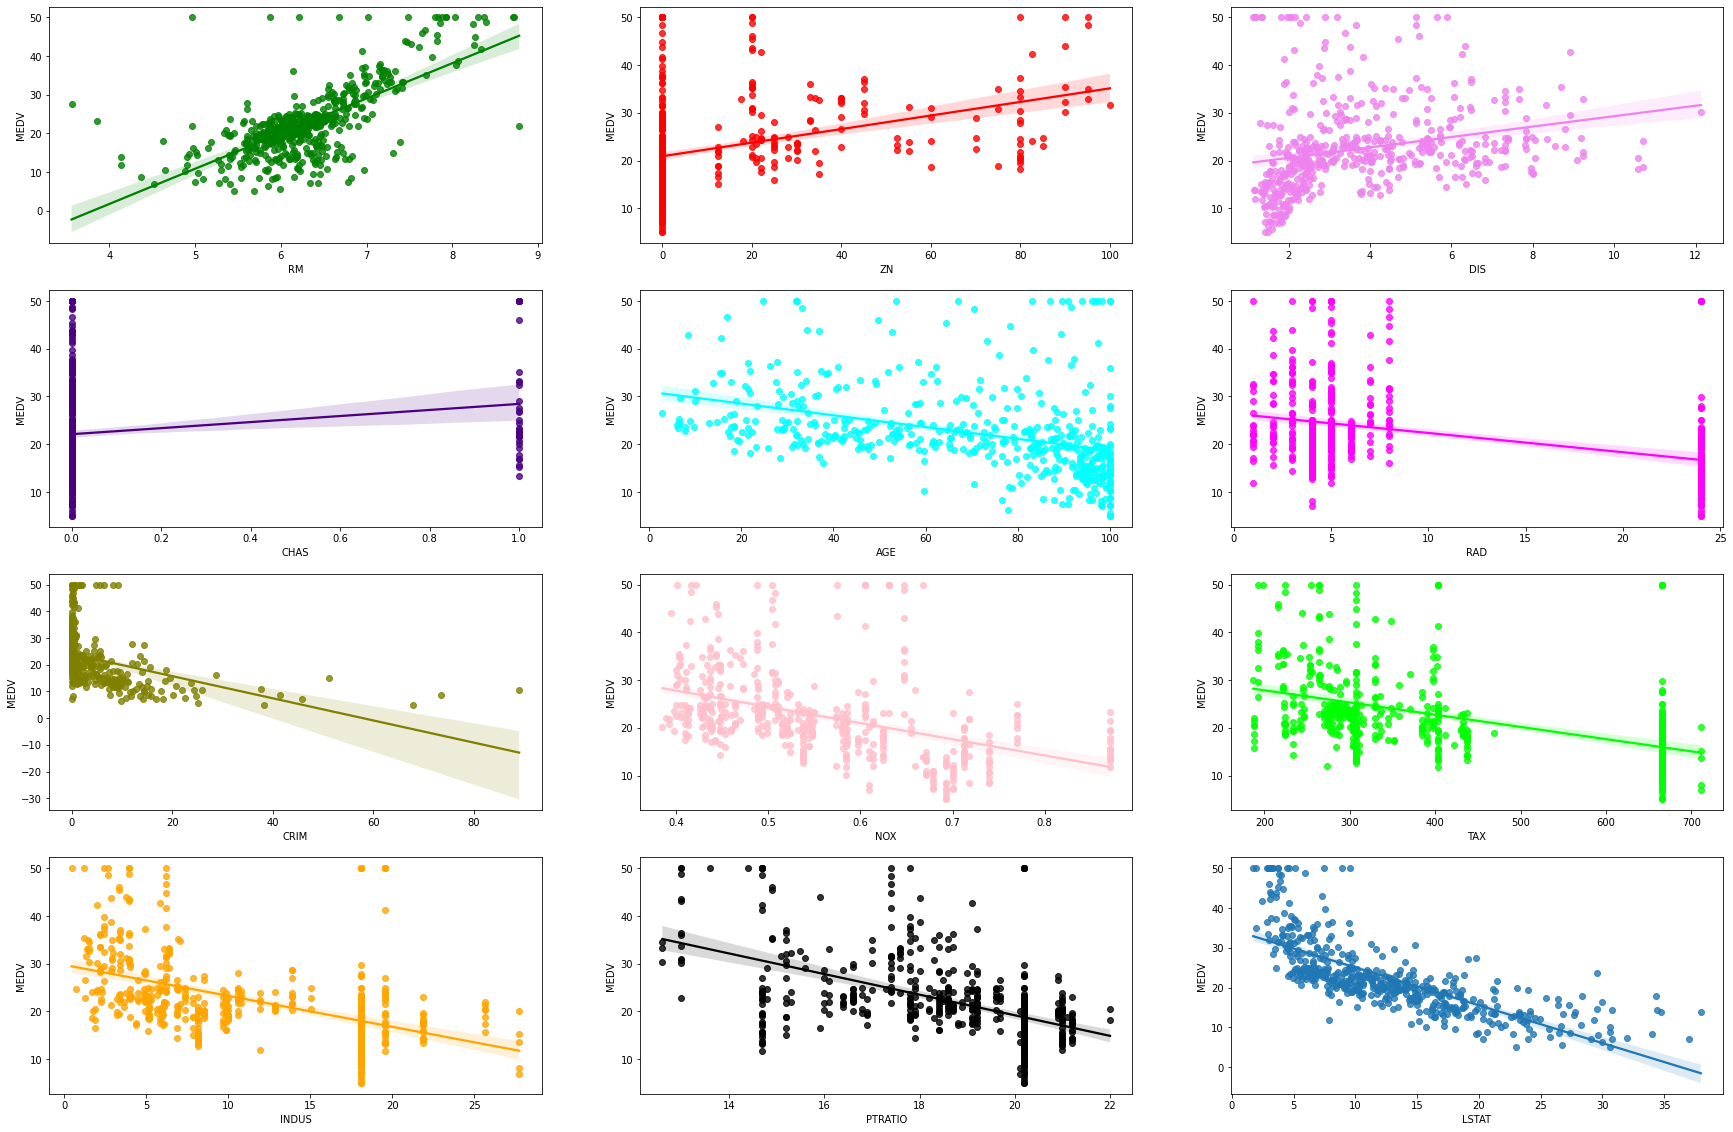

In [115]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows= 4, ncols = 3, figsize=(30,20))
sns.regplot(x='RM',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax1,color='green')
sns.regplot(x='ZN',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax2,color='red')
sns.regplot(x='DIS',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax3,color='violet')
sns.regplot(x='CHAS',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax4,color='indigo')
sns.regplot(x='AGE',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax5,color='#00FFFF')
sns.regplot(x='RAD',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax6,color='#FF00FF')
sns.regplot(x='CRIM',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax7,color='#808000')
sns.regplot(x='NOX',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax8,color='#FFC0CB')
sns.regplot(x='TAX',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax9,color='#00FF00')
sns.regplot(x='INDUS',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax10,color='#FFA500')
sns.regplot(x='PTRATIO',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax11,color='#000000')
sns.regplot(x='LSTAT',y='MEDV',data=data,scatter=True,fit_reg=True,ax=ax12)


Hence by the above following regplot and heatmap,RM and LSAT are the two best feature for predicting MEDV.


# <font color= violet>Applying Multiverative_Regression</font> 

RM vs MEDV

In [116]:
x1 = data['RM']
y1 = data['MEDV']

RM vs MEDV

In [117]:
model = linear_model.LinearRegression()
model.fit(x1.values.reshape(len(x1),1),y1)

LinearRegression()

In [118]:
print('coef = ',model.coef_)
print('intercept = ',model.intercept_)

coef =  [9.10210898]
intercept =  -34.67062077643851


Text(0, 0.5, 'MEDV')

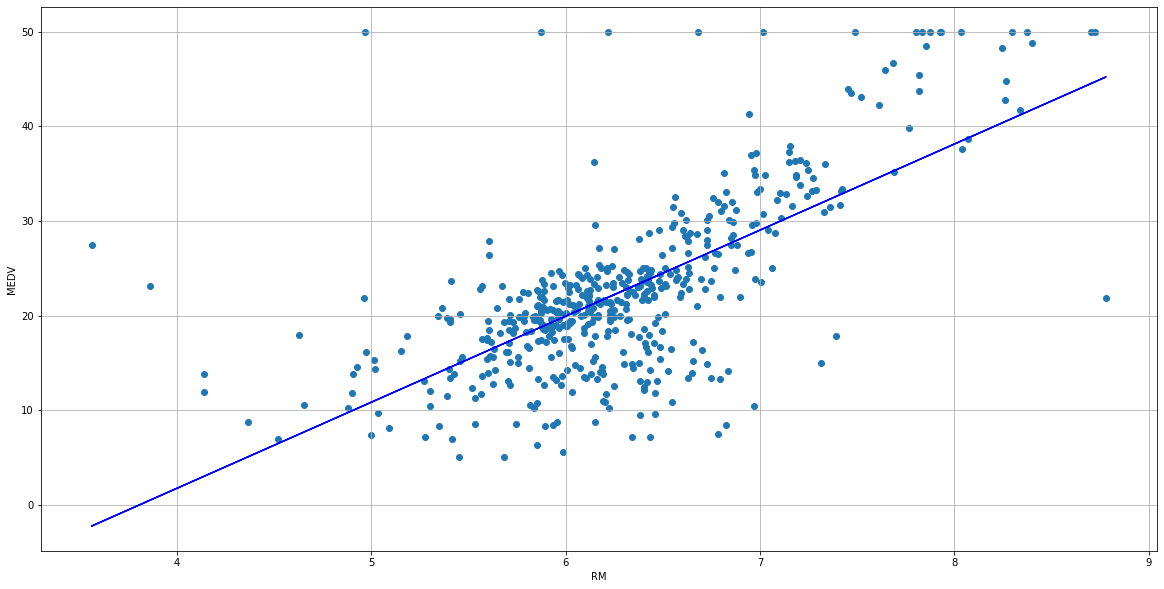

In [119]:
plt.figure(figsize=(20,10))
plt.plot(x1,model.predict(x1.values.reshape(len(x1),1)),color='blue')
plt.scatter(x1,y1)
plt.grid()
plt.xlabel('RM')
plt.ylabel('MEDV')

In [120]:
predict_values_1 = pd.DataFrame(model.predict(x1.values.reshape(len(x1),1)),columns=['predict_values_by_multivartive_reg.'])

In [121]:
actual_value = data['MEDV']

In [122]:
res_1 = pd.concat([predict_values_1,actual_value],axis=1)

In [123]:
res_1

,predict_values_by_multivartive_reg.,MEDV
0,25.175746,24.0
1,23.774021,21.6
2,30.728032,34.7
3,29.025938,33.4
4,30.382152,36.2
...,...,...
501,25.339584,22.4
502,21.034286,20.6
503,28.825691,23.9
504,27.169108,22.0


<AxesSubplot:xlabel='MEDV', ylabel='predict_values_by_multivartive_reg.'>

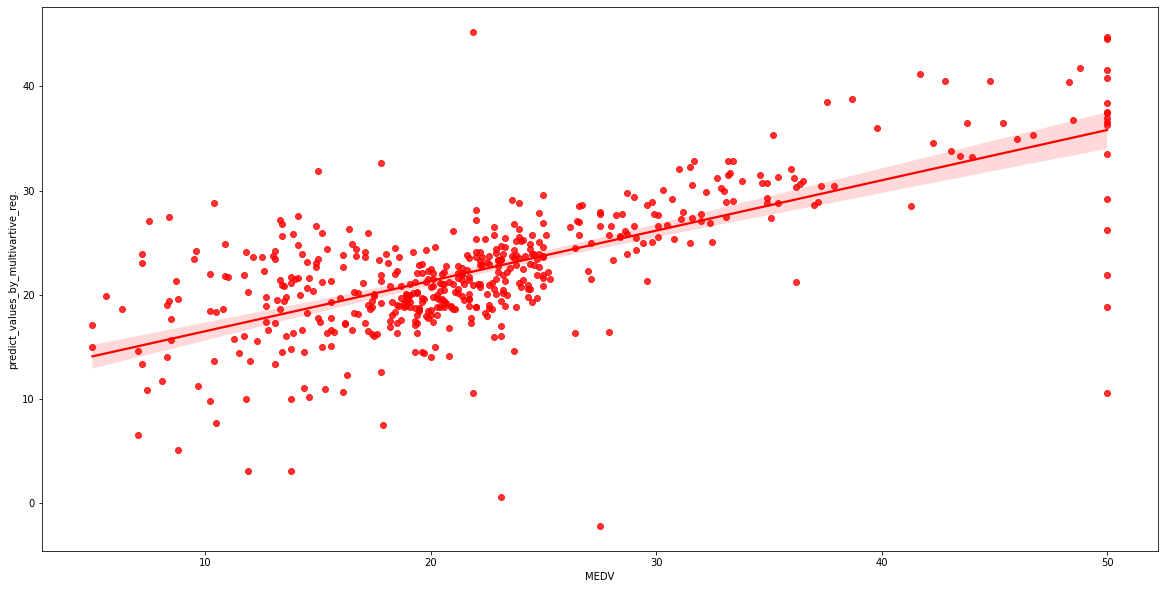

In [124]:
plt.figure(figsize=(20,10))
sns.regplot(x=actual_value,y=predict_values_1,data=res_1,scatter=True,fit_reg=True,color='red')

LSTAT vs MEDV

In [125]:
x2 = data['LSTAT']
y2 = data['MEDV']

In [126]:
model = linear_model.LinearRegression()
model.fit(x2.values.reshape(len(x2),1),y2)

LinearRegression()

In [127]:
print('coef = ',model.coef_)
print('intercept = ',model.intercept_)

coef =  [-0.95004935]
intercept =  34.55384087938312


Text(0, 0.5, 'MEDV')

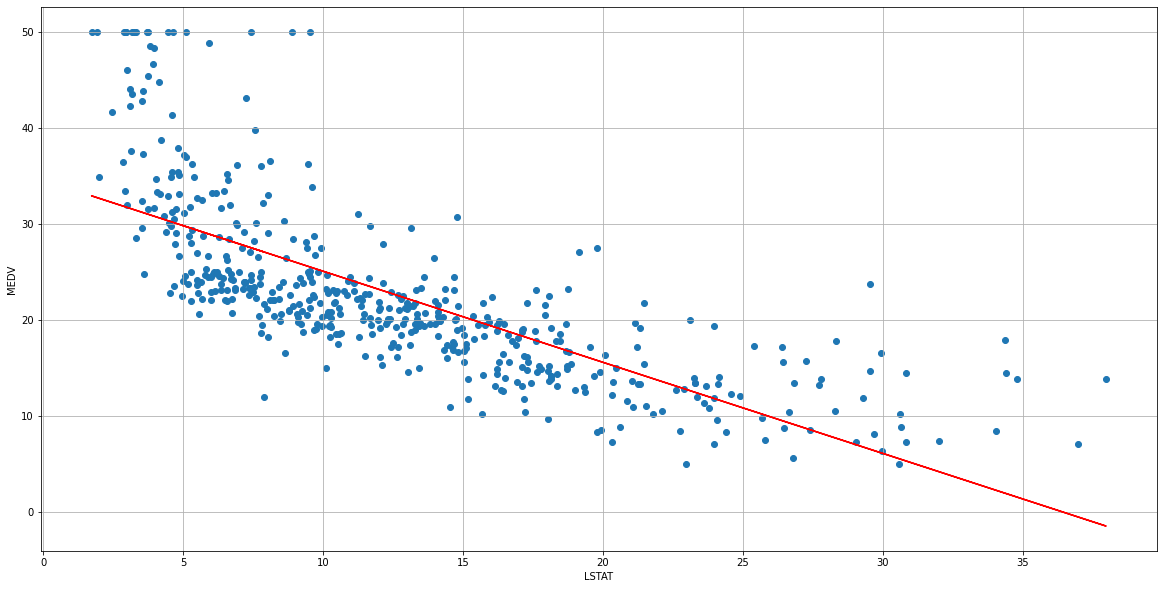

In [128]:
plt.figure(figsize=(20,10))
plt.plot(x2,model.predict(x2.values.reshape(len(x2),1)),color='red')
plt.scatter(x2,y2)
plt.grid()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [129]:
predict_values_2 = pd.DataFrame(model.predict(x2.values.reshape(len(x2),1)),columns=['predict_values_by_multivartive_reg.'])

In [130]:
res_2 = pd.concat([predict_values_2,actual_value],axis=1)

In [131]:
res_2

,predict_values_by_multivartive_reg.,MEDV
0,29.822595,24.0
1,25.870390,21.6
2,30.725142,34.7
3,31.760696,33.4
4,29.490078,36.2
...,...,...
501,25.366864,22.4
502,25.927393,20.6
503,29.195563,23.9
504,28.397521,22.0


<AxesSubplot:xlabel='MEDV', ylabel='predict_values_by_multivartive_reg.'>

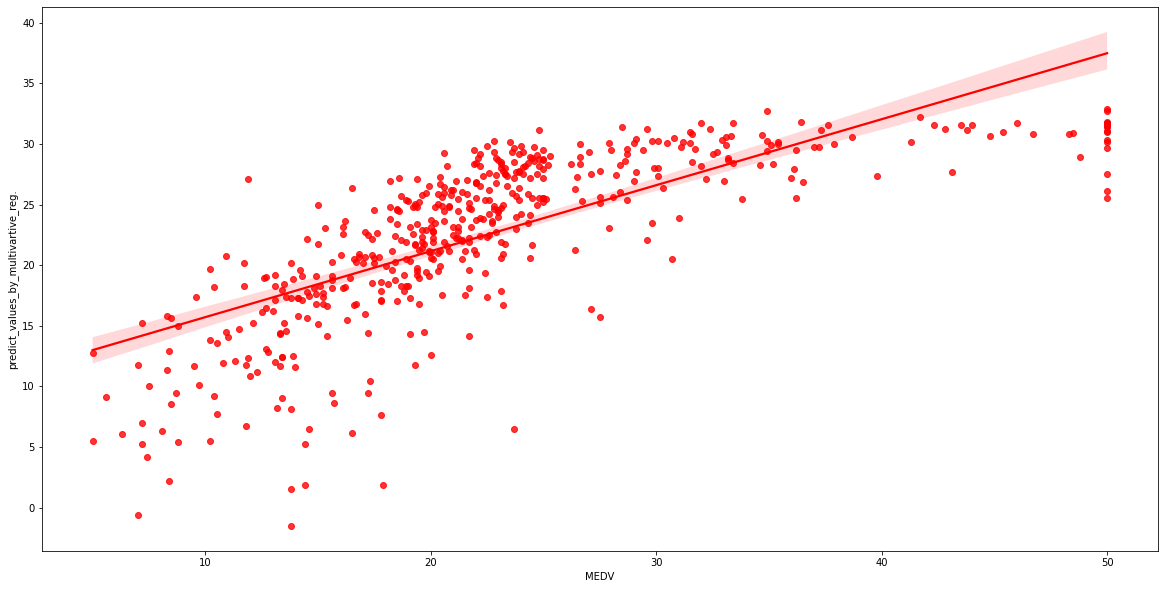

In [132]:
plt.figure(figsize=(20,10))
sns.regplot(x=actual_value,y=predict_values_2,data=res_2,scatter=True,fit_reg=True,color='red')

# <font color= violet>Applying Lasso_Regression</font> 

RM vs MEDV

In [133]:
p = x1.values.reshape(-1, 1)

coef  [8.78163994]
intercept  -32.656589998377


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Text(0, 0.5, 'Predicted')

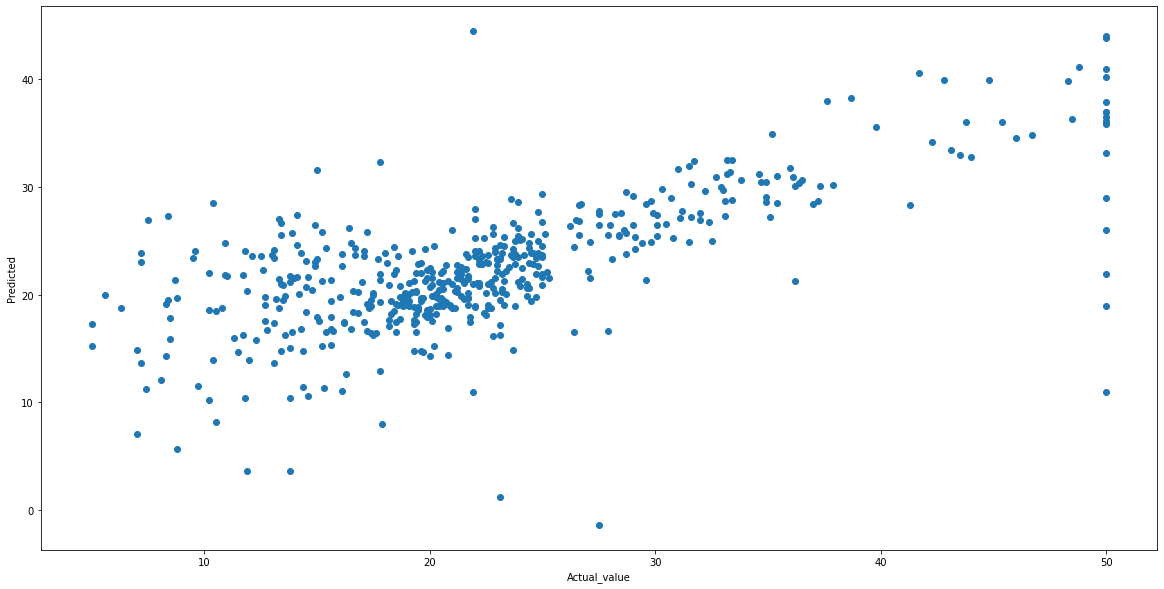

In [134]:
plt.figure(figsize=(20,10))
lasso_reg = linear_model.Lasso(normalize=True,alpha=0.01)
lasso_reg.fit(p,y1)
print('coef ', lasso_reg.coef_)
print('intercept ',lasso_reg.intercept_)
lasso_predicted = lasso_reg.predict(p)
plt.scatter(y1,lasso_predicted)
plt.xlabel("Actual_value")
plt.ylabel("Predicted")

In [135]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y1,lasso_predicted))

R squared value  0.48292606880779587


LSTAT VS MEDV

In [136]:
q = x2.values.reshape(-1, 1)

coef  [-0.91851804]
intercept  34.15487318362821


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Text(0, 0.5, 'Predicted')

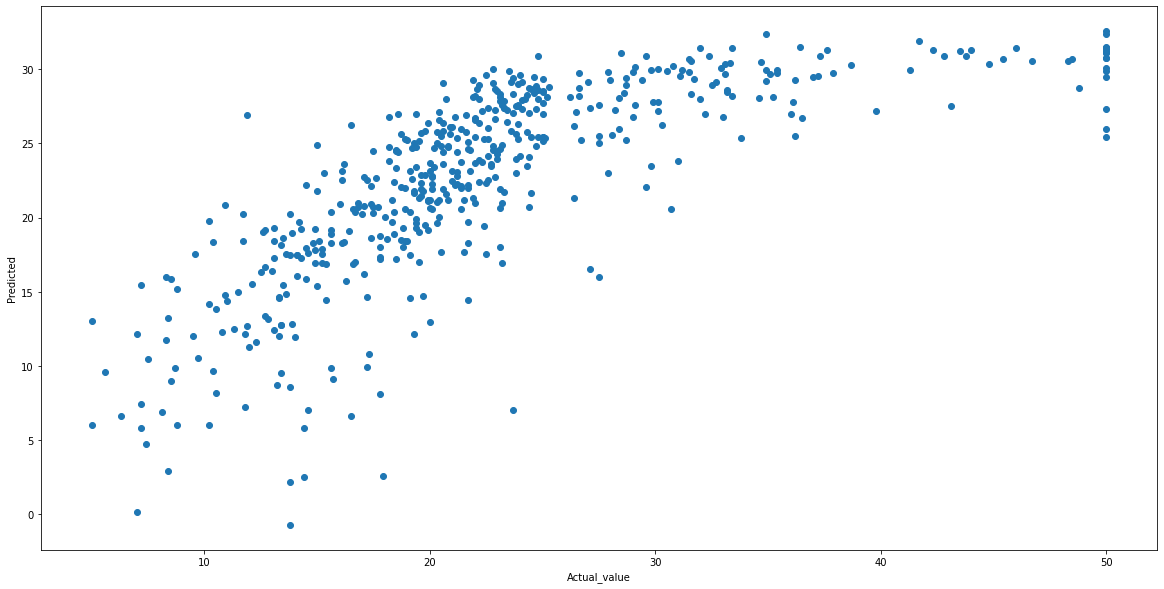

In [137]:
plt.figure(figsize=(20,10))
lasso_reg = linear_model.Lasso(normalize=True,alpha=0.01)
lasso_reg.fit(q,y2)
print('coef ', lasso_reg.coef_)
print('intercept ',lasso_reg.intercept_)
lasso_predicted = lasso_reg.predict(q)
plt.scatter(y2,lasso_predicted)
plt.xlabel("Actual_value")
plt.ylabel("Predicted")


In [138]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y2,lasso_predicted))

R squared value  0.5435469104029413


# <font color= violet>Applying Rigde_Regression</font> 

RM vs MEDV

coef  [8.66867522]
intercept  -31.946648057364737


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Text(0, 0.5, 'Predicted')

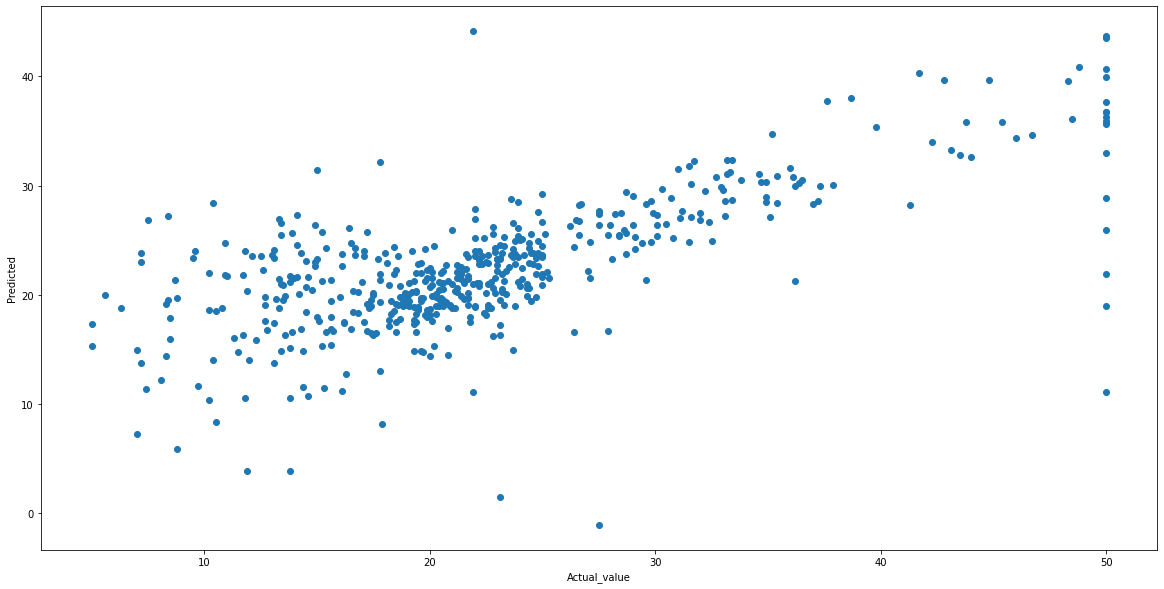

In [139]:
plt.figure(figsize=(20,10))
ridge_reg = linear_model.Ridge(normalize=True,alpha=0.05)
ridge_reg.fit(p,y1)
print('coef ', ridge_reg.coef_)
print('intercept ',ridge_reg.intercept_)
ridge_predicted = ridge_reg.predict(p)
plt.scatter(y1,ridge_predicted)
plt.xlabel("Actual_value")
plt.ylabel("Predicted")

In [140]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y1,ridge_predicted))

R squared value  0.48242902638591156


LSTAT VS MEDV

coef  [-0.90480891]
intercept  33.981410662465365


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Text(0, 0.5, 'Predicted')

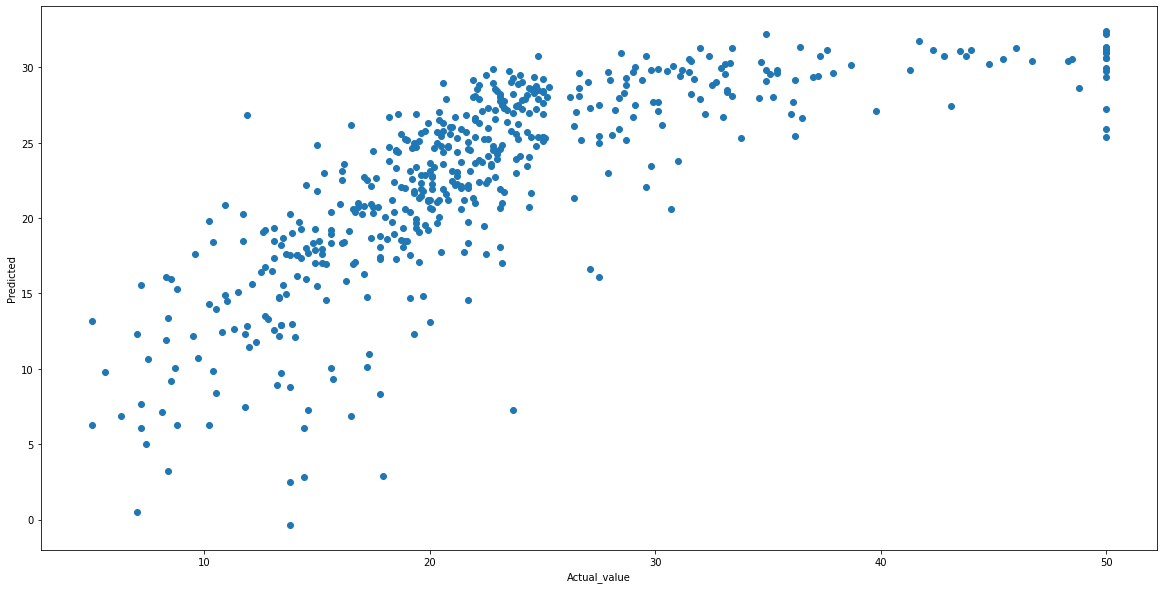

In [141]:
plt.figure(figsize=(20,10))
ridge_reg = linear_model.Ridge(normalize=True,alpha=0.05)
ridge_reg.fit(q,y2)
print('coef ', ridge_reg.coef_)
print('intercept ',ridge_reg.intercept_)
ridge_predicted = ridge_reg.predict(q)
plt.scatter(y2,ridge_predicted)
plt.xlabel("Actual_value")
plt.ylabel("Predicted")

In [142]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y2,ridge_predicted))

R squared value  0.5429124057552178
